In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
## Generation of Input data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0, 0.1], [0.1, 1.1]])

mean_02 = np.array([6.0, 6.0])
cov_02 = np.array([[1.0, 0.1], [0.1, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape
print dist_02.shape

(500, 2)
(500, 2)


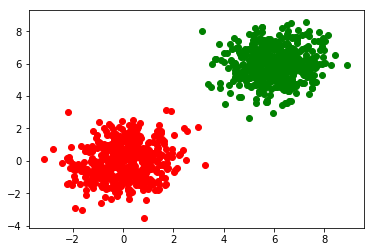

In [18]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='green')

plt.show()

In [21]:
data = np.vstack((dist_01, dist_02))
print data.shape
data_2 = np.hstack((dist_01, dist_02))
print data_2.shape
data_3 = np.concatenate((dist_01, dist_02))
print data_3.shape

(1000, 2)
(500, 4)
(1000, 2)


In [25]:
t1 = np.random.random((10, 2))
t2 = np.random.random((10, 2))
ans = np.concatenate((t1, t2), axis=1)
print ans.shape

(10, 4)


In [27]:
## Input Dataset
data = np.vstack((dist_01, dist_02))
np.random.shuffle(data)

In [35]:
## KMeans clustering definition
K = 4
num_iters = 5
clusters = {}
colors = ['red', 'green', 'blue', 'yellow']
for cx in range(K):
    cluster_vals = {
        'centroid': np.random.uniform(low=data.min(), high=data.max(), size=(data.shape[1])),
        'points': [],
        'color': colors[cx],
        'history': []
    }
    clusters[cx] = cluster_vals

In [36]:
## Distance Function
def distance(p1, p2):
    '''Eucledian Distance Function'''
    return np.sqrt(((p1-p2)**2).sum())


distance(np.array([0.0, 0.0]), np.array([1.0, 1.0]))

1.4142135623730951

In [37]:
for cx in clusters:
    print cx, clusters[cx]

0 {'color': 'red', 'points': [], 'centroid': array([-3.03558194,  1.54557751]), 'history': []}
1 {'color': 'green', 'points': [], 'centroid': array([ 1.66628139, -1.40161185]), 'history': []}
2 {'color': 'blue', 'points': [], 'centroid': array([ 4.16419129, -1.0705965 ]), 'history': []}
3 {'color': 'yellow', 'points': [], 'centroid': array([ 3.74845252, -2.90268351]), 'history': []}


Steps in each iteration:
1. Assign points to clusters
    - Compute Distance
    - Find argmin
2. Update centroid location
    - Compute Mean
3. Initialise for next iteration
    - Add to history
    - Empty list

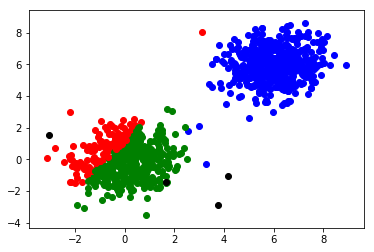

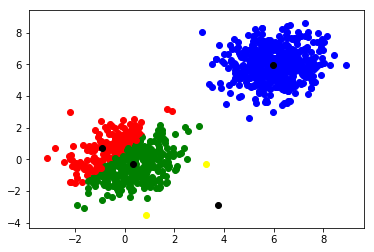

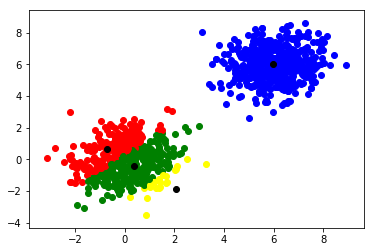

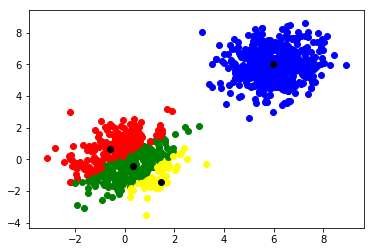

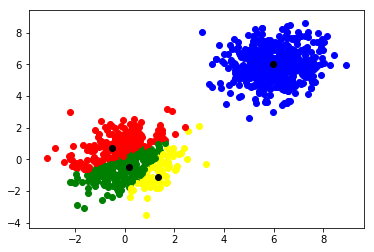

In [38]:
## KMeans algorithm
for ix in range(num_iters):
    plt.figure(ix)
    
    ## Step 1 - Assign Points to clusters
    for px in range(data.shape[0]):
        dist = []
        for cx in range(K):
            d = distance(data[px], clusters[cx]['centroid'])
            dist.append(d)
        
        dist = np.array(dist)
        cluster_id = np.argmin(dist)
        clusters[cluster_id]['points'].append(data[px])
        
        ## For Visualisation
        plt.scatter(data[px, 0], data[px, 1], c=clusters[cluster_id]['color'])
    
    ## Step 2 - Update cluster centroids
    for cx in range(K):
        ## For Visualisation
        plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], c='black')
        
        old_centroid = clusters[cx]['centroid']
        clusters[cx]['history'].append(old_centroid)
        
        if len(clusters[cx]['points']) > 0:
            new_centroid = np.mean(np.array(clusters[cx]['points']), axis=0)
            clusters[cx]['centroid'] = new_centroid
            
        ## Step 3 - Reinitialise
        clusters[cx]['points'] = []
        
    plt.show()